In [1]:
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [2]:
#step 1 : data preparing
(data_train , label_train) , (data_test , label_test) = boston_housing.load_data()

#normalization

mean = data_train.mean(axis = 0)
std = data_train.std(axis = 0)


x_train = (data_train - mean) / std
x_test = (data_test - mean) / std

In [3]:
#step 2 : model design
def build_model():
    model = Sequential([
        layers.Dense(64 , activation = "relu" , input_shape = (13,)),
        layers.Dense(64 , activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics = ["mae"])
    return model

model = build_model()
print(model.summary())

C:\Users\11\anaconda3\envs\tf\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [4]:
#step 3 : Training

history = model.fit(x_train , label_train ,
                    batch_size = 16 ,
                    epochs = 20,
                    validation_split = 0.1)


    

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 505.3726 - mae: 20.5228 - val_loss: 341.8438 - val_mae: 17.4703
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 337.1731 - mae: 16.3549 - val_loss: 191.8772 - val_mae: 12.7631
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 184.9938 - mae: 11.2637 - val_loss: 81.3793 - val_mae: 7.6024
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 92.1191 - mae: 7.2543 - val_loss: 38.6365 - val_mae: 5.2411
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.5829 - mae: 5.3364 - val_loss: 24.6457 - val_mae: 4.1136
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.3930 - mae: 4.3060 - val_loss: 18.1800 - val_mae: 3.6042
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.3676 - mae: 3.7112 - val_loss: 16.5203 - val_mae: 3.3589
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.5673 - mae: 3.4110 - val_loss: 15.5846 - val_mae: 3.2209
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/s

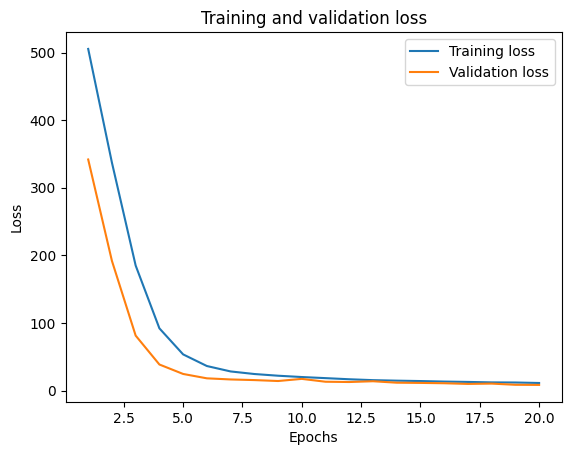

In [5]:
#step 4 : Evaluation

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()